In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
user_data = pd.read_csv("../kafka-consumer/data/watched_combined.csv")

In [3]:
user_movie_count = user_data.value_counts("user")

In [ ]:
# print(type(user_movie_count))

<class 'pandas.core.series.Series'>


(array([23539., 20546., 85272.,   916.,  1068.,  1363.]),
 array([ 1. ,  7.5, 14. , 20.5, 27. , 33.5, 40. ]),
 <BarContainer object of 6 artists>)

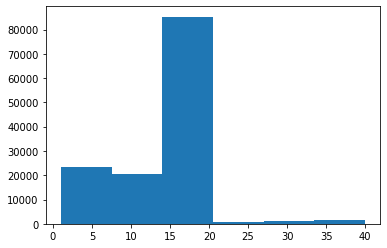

In [4]:
plt.hist(user_movie_count, bins = 6)

In [5]:
singles_removed = user_movie_count[:len(user_movie_count)//5]

(array([23525.,   285.,   452.,   292.,   453.,   348.,   594.,   591.]),
 array([20. , 22.5, 25. , 27.5, 30. , 32.5, 35. , 37.5, 40. ]),
 <BarContainer object of 8 artists>)

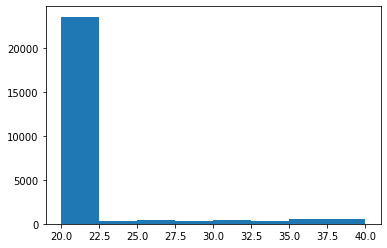

In [6]:
plt.hist(singles_removed, bins = 8)


In [7]:
singles_removed = singles_removed[singles_removed>5]

In [8]:
len(singles_removed)

26540

In [ ]:
test = pd.DataFrame(columns=["user", "movie"])
ref_data = pd.DataFrame(columns=["user", "movie"])

for count, id in enumerate(singles_removed.index):
    user_movies = user_data[user_data["user"]==id]
    if count%1000==0:
        print(count, end=' ')
    test = pd.concat([test,user_movies.iloc[-5:]])
    ref_data = pd.concat([ref_data,user_movies.iloc[:-5]])
test.to_csv("test.csv")
ref_data.to_csv("ref_data.csv")

In [2]:
test_data = pd.read_csv("test.csv")
print(test_data.head(6))

   Unnamed: 0    user                                         movie
0       40182  117931                             the+notebook+2004
1       40183  117931  the+princess+diaries+2+royal+engagement+2004
2       40184  117931                     the+princess+diaries+2001
3       40185  117931                 the+silence+of+the+lambs+1991
4       40186  117931                                     troy+2004
5     1446928  736654                     the+royal+tenenbaums+2001


In [3]:
ref_data = pd.read_csv("ref_data.csv")
print(ref_data.head())

   Unnamed: 0    user                                 movie
0       40147  117931                 along+came+polly+2004
1       40148  117931  around+the+world+in+eighty+days+1956
2       40149  117931                     brother+bear+2003
3       40150  117931                   calendar+girls+2003
4       40151  117931             cheaper+by+the+dozen+1950


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import pickle
# sys.path.append('')
sys.path.insert(1, os.getcwd()+'/../content_based_model/')
print(sys.path)

['/home/bhavuks/Desktop/group-project-s22-the-avengers/accuracy_measure', '/home/bhavuks/Desktop/group-project-s22-the-avengers/accuracy_measure/../content_based_model/', '/usr/lib/python38.zip', '/usr/lib/python3.8', '/usr/lib/python3.8/lib-dynload', '', '/home/bhavuks/.local/lib/python3.8/site-packages', '/usr/local/lib/python3.8/dist-packages', '/usr/lib/python3/dist-packages']


In [5]:
# from collaborative_rec import predictAndRecommend
from content_based_testing import recommend_user

In [6]:
print("Gathering DATA")
data = pd.read_csv("../kafka-consumer/data/clean_data_combined.csv")
user_data = pd.read_csv("../kafka-consumer/data/watched_combined.csv")
user_set = set(user_data["user"])
print(len(user_set))

print("Loading data")
loaded_model = pickle.load(open("../content_based_model/2_saved_model_m1", "rb"))
print("Mapping data")
# Movies index mapping
mapping = pd.Series(range(len(data['id'])), index = data['id'])


Gathering DATA
132704
Loading data
Mapping data


In [7]:
recommend_user_new = lambda userid: recommend_user(userid, data, user_data, loaded_model, mapping)

In [8]:
recommend_user(18792, data, user_data, loaded_model, mapping)

[]

In [9]:
def metrics(recommend_fn):
    total_users = len(test["user"].unique())
    print("Total users tested:",total_users)
    count = 0
    avg_prec = 0
    top_5_acc = 0
    top_10_acc = 0
    top_20_acc = 0
    for user_id in test["user"].unique():
        count+=1
        if count%100 == 0:
            print(count)
        top_5 = top_10_prec = top_10 = top_20 = 0
        next_watched = test[test["user"]==user_id]["movie"]
        rec_movies = recommend_fn(user_id)
        for movie in next_watched:
            if movie in rec_movies[:5]:
                top_20 = top_10 = top_5 = 1
            elif movie in rec_movies[:10]:
                top_20 = top_10 = 1
            elif movie in rec_movies:
                top_20 = 1
        for movie in rec_movies[:5]:
            if movie in next_watched:
                top_10_prec+=1
        top_5_acc += top_5; top_10_acc += top_10; top_20_acc += top_20
        avg_prec += top_10_prec
    return np.array([avg_prec, top_5_acc, top_10_acc, top_20_acc])/total_users

In [10]:
test = test_data
print(metrics(recommend_user_new))

Total users tested: 26540
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18

In [11]:
print(metrics_data)

NameError: name 'metrics_data' is not defined